In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt

In [58]:
df = pd.read_csv("Datasets\AusGas.csv")

In [59]:
df.head()

,Month,GasProd
0,Jan-1956,1709
1,Feb-1956,1646
2,Mar-1956,1794
3,Apr-1956,1878
4,May-1956,2173


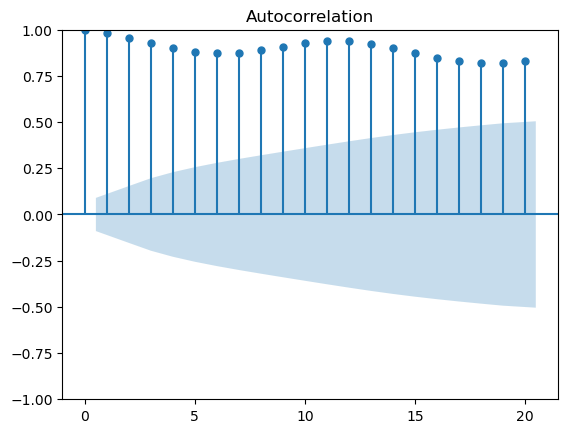

In [60]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["GasProd"], lags = 20)
plt.show()

In [61]:
y = df["GasProd"]

y_train = df["GasProd"][:464]
y_test = df["GasProd"][464:]

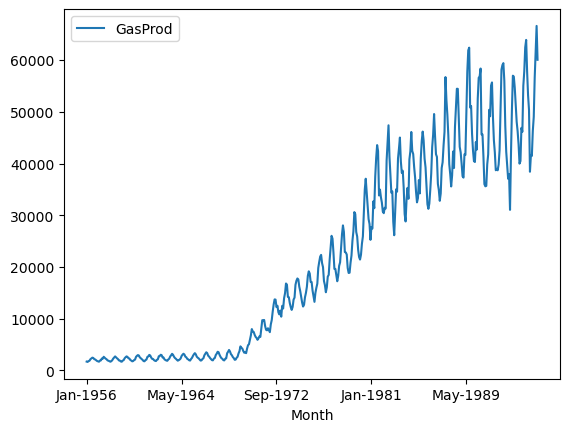

In [62]:
df.plot.line(x = "Month" , y = "GasProd")
plt.show()

# Autoregression

In [63]:
from statsmodels.tsa.ar_model import AutoReg

In [100]:
model = AutoReg(y_train, lags = 3 )
model_fit = model.fit()
print("coefficients %s"%model_fit.params)

coefficients const         367.207165
GasProd.L1      1.245517
GasProd.L2     -0.083027
GasProd.L3     -0.176470
dtype: float64


### Make Predictions

In [65]:
predictions = model_fit.predict(start = len(y_train),
                               end = len(y_train)+len(y_test)-1,
                               dynamic = False)

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
error  = mean_squared_error(y_test, predictions)
print("Test RMSE: %.3f" % sqrt(error))

Test RMSE: 13781.796


### Plot results

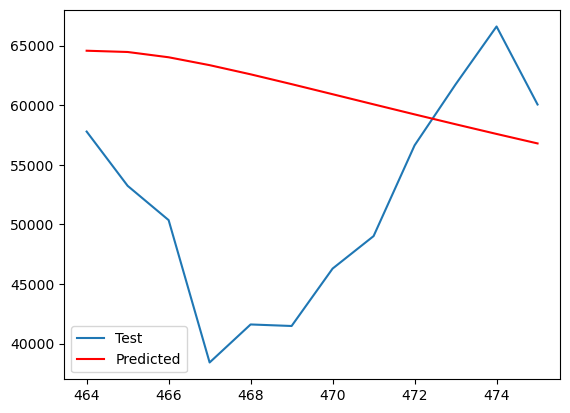

In [68]:
#plt.plot(y_train, label = "Train")
plt.plot(y_test, label = "Test")
plt.plot(predictions, color = "red", label = "Predicted")
plt.legend(loc = "best")
plt.show()

### Plot

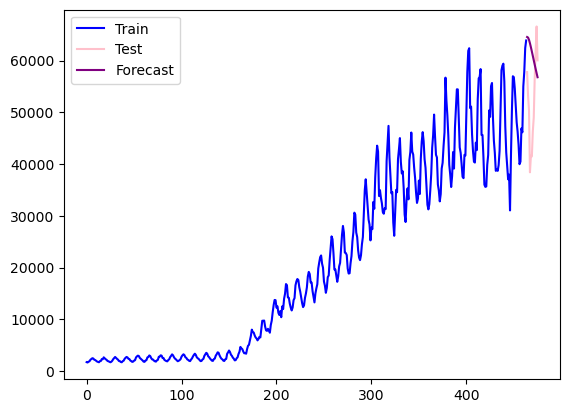

In [69]:
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
predictions.plot(color="purple", label='Forecast')
plt.legend(loc='best')
plt.show()

# MA

Assumes the value of the dependent variable on the current day depends on the previous days error terms.

### Training model

In [70]:
from statsmodels.tsa.arima.model import ARIMA

In [71]:
model = ARIMA(y_train ,
             order = (0,0,2))
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Coefficients: const     2.063165e+04
ma.L1     1.485266e+00
ma.L2     9.998945e-01
sigma2    4.334593e+07
dtype: float64


# make predictions

In [72]:
predictions = model_fit.predict(start = len(y_train),
                                end = len(y)-1,
                               #end = len(y_train)+len(y_test)-1,
                               dynamic = False)

In [73]:
error  = mean_squared_error(y_test, predictions)
print("Test RMSE: %.3f" % sqrt(error))

Test RMSE: 29464.447


### Plot results

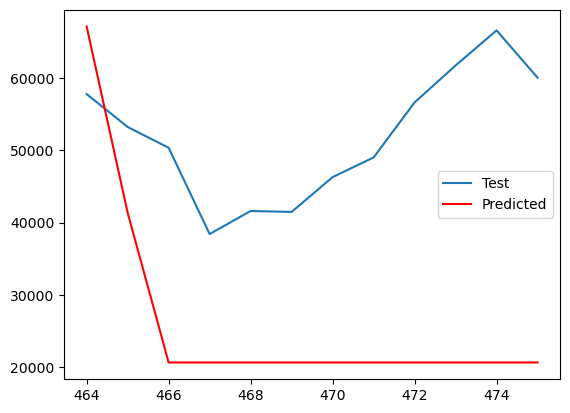

In [74]:
plt.plot(y_test, label = "Test")
plt.plot(predictions,color = "red", label = "Predicted")
plt.legend(loc = "best")
plt.show()

### Plot

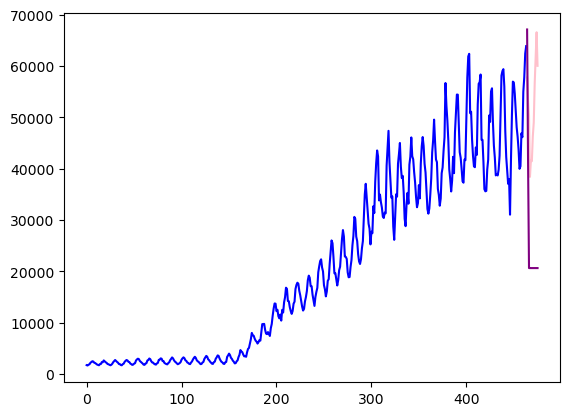

In [75]:
y_train.plot(color="blue")
y_test.plot(color="pink")
predictions.plot(color="purple")
plt.show()

# ARMA
Auto Regressive Moving Average

In [76]:
from statsmodels.tsa.arima.model import ARIMA

### Train Arima

In [77]:
model = ARIMA(y_train, order = (2,0,2))
# What does (2,0,2) stand for?
model_fit = model.fit()

print('Coefficients: %s' % model_fit.params)

Coefficients: const     2.062608e+04
ar.L1     1.216041e+00
ar.L2    -2.327380e-01
ma.L1     4.208055e-02
ma.L2     2.536184e-01
sigma2    6.312850e+06
dtype: float64


### Make Predictions

In [78]:
predictions = model_fit.predict(start=len(y_train), 
                                end=len(y)-1, 
                                dynamic=False)

In [79]:
error = mean_squared_error(y_test, predictions)
print('Test RMSE: %.3f' % sqrt(error))

Test RMSE: 12919.706


### Plot results

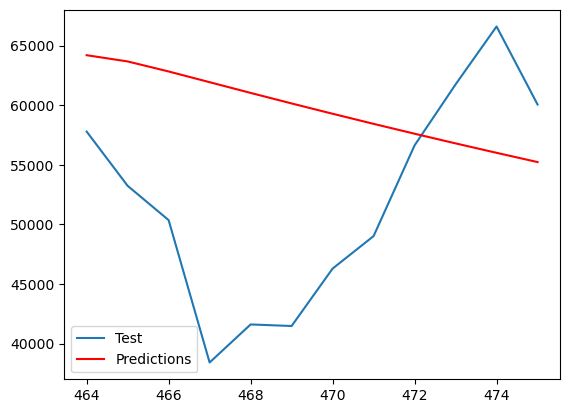

In [80]:
plt.plot(y_test, label='Test')
plt.plot(predictions, color='red', label='Predictions')
plt.legend(loc='best')
plt.show()

### Plot

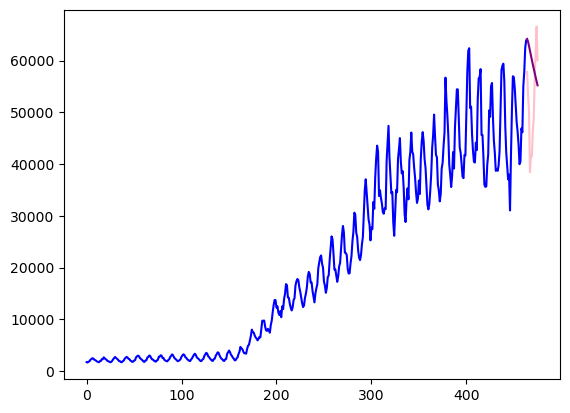

In [81]:
y_train.plot(color="blue")
y_test.plot(color="pink")
predictions.plot(color="purple")
plt.show()

# Dicky Fuller Test

In [82]:
from statsmodels.tsa.stattools import adfuller

In [83]:
def adfuller_test(ts):
    adfuller_result = adfuller(ts, autolag=None)
    adfuller_out = pd.Series(adfuller_result[0:4],
    index=[ 'Test Statistic',
    'p-value',
    'Lags Used',
    'Number of Observations Used'])
    print(adfuller_out)

In [84]:
adfuller_test(y_train)

Test Statistic                   0.835783
p-value                          0.992192
Lags Used                       18.000000
Number of Observations Used    445.000000
dtype: float64


In [85]:
# ARIMA

from statsmodels.tsa.arima.model import ARIMA

In [86]:
# train MA
model = ARIMA(y_train,order=(4,1,2))
model_fit = model.fit()

print('Coefficients: %s' % model_fit.params)

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Coefficients: ar.L1     1.346304e+00
ar.L2    -4.860259e-01
ar.L3    -1.124039e-01
ar.L4    -1.577550e-01
ma.L1    -1.744343e+00
ma.L2     9.511284e-01
sigma2    4.314449e+06
dtype: float64


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [87]:
# make predictions
predictions = model_fit.predict(start=len(y_train), 
                                end=len(y)-1, 
                                dynamic=False)
    
error = mean_squared_error(y_test, predictions)
print('Test RMSE: %.3f' % sqrt(error))

Test RMSE: 2679.117


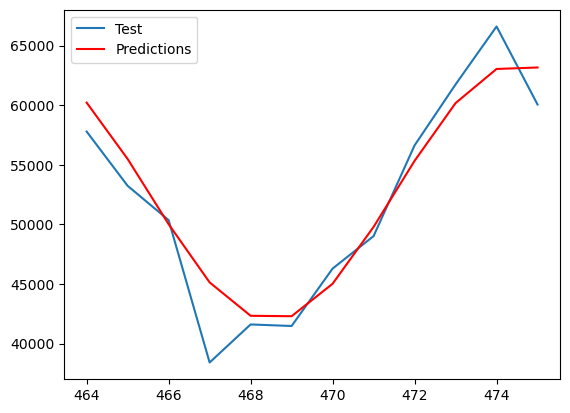

In [88]:
# plot results
plt.plot(y_test, label='Test')
plt.plot(predictions, color='red', label='Predictions')
plt.legend(loc='best')
plt.show()

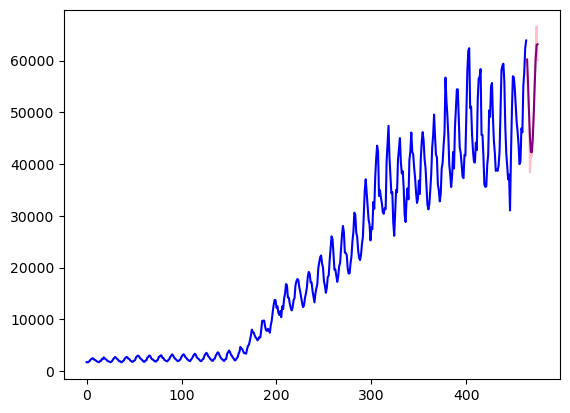

In [89]:
# plot
y_train.plot(color="blue")
y_test.plot(color="pink")
predictions.plot(color="purple")
plt.show()

# Auto ARIMA 

AutoRegressive Integrated Moving Average Model

## Installling pmdarima

! pip install pmdarima

In [109]:
from pmdarima.arima import auto_arima

In [91]:
# autoarima is used to 
model = auto_arima(y_train,
                    trace = True,
                    error_action = "ignore",
                    suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8355.052, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8632.352, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8589.946, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8603.593, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8631.502, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.932, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8577.053, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8325.395, Time=1.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8426.135, Time=0.82 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8271.037, Time=1.21 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8404.272, Time=0.97 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=8390.964, Time=1.30 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=8

In [94]:
forecast = model.predict(n_periods = len(y_test))

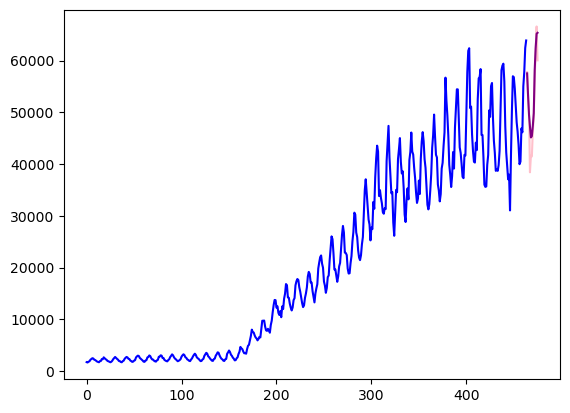

In [95]:
plt.plot(y_train,
        label = "Train",
        color = "blue")

plt.plot(y_test,
         label="Valid",
        color = "pink")

plt.plot(forecast,
        label = "Prediction",
        color = "purple")

plt.show()

## Plot Results

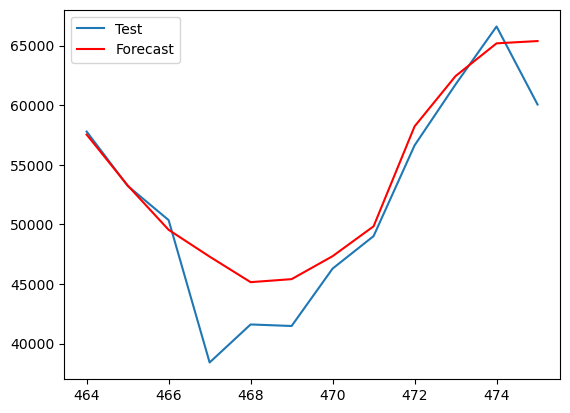

In [96]:
plt.plot(y_test,
         label = "Test")

plt.plot(forecast,
        color = "red",
        label = "Forecast")

plt.legend(loc = "best")

# SARIMA

In [92]:
model = auto_arima(y_train,
                   trace = True,
                   error_action = "ignore",
                   seasonal = True, #For Sarima
                   m=12,
                   suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.72 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8632.352, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8255.565, Time=0.71 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8438.509, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8631.502, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8589.946, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.59 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=8177.113, Time=1.29 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=8438.053, Time=0.46 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=8218.666, Time=2.66 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=8230.130, Time=3.25 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=8371.138, Time=1.32 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.01 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8219.426, Time=0.96 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

In [97]:
forecast = model.predict(n_periods = len(y_test))

## Plot Predictions for Validation set

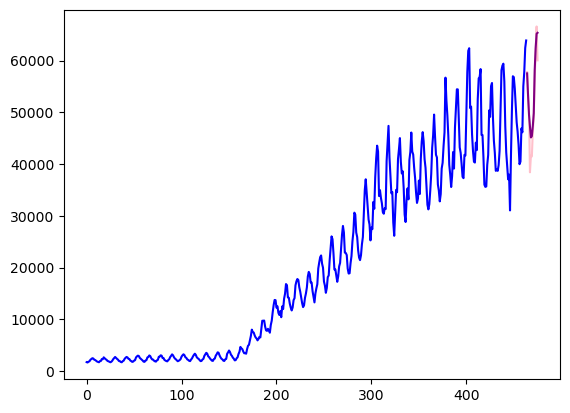

In [98]:
plt.plot(y_train,
        label = "Train",
        color = "blue")

plt.plot(y_test,
         label="Valid",
        color = "pink")

plt.plot(forecast,
        label = "Prediction",
        color = "purple")

plt.show()

## Plot Results

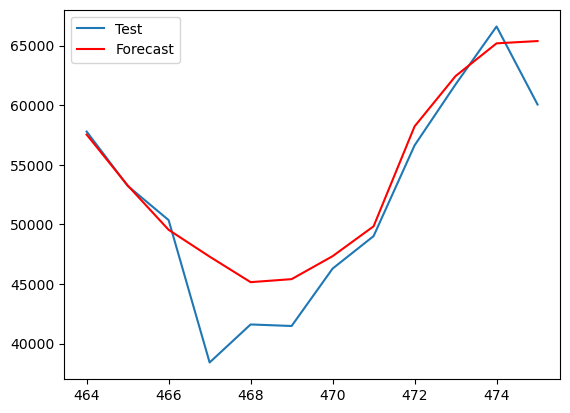

In [99]:
plt.plot(y_test,
         label = "Test")

plt.plot(forecast,
        color = "red",
        label = "Forecast")

plt.legend(loc = "best")

### Evaluation

In [56]:
rmse  = mean_squared_error(y_test, predictions)
print("Test RMSE: %.3f" % sqrt(error))

Test RMSE: 29464.447
